In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('preprocessed_data.csv', index_col = 0)

In [3]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality,good_wine
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5,0
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5,0
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5,0
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6,1
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5,0


### Splitting Dataset Into Train And Test Sets

In [4]:
from sklearn.model_selection import train_test_split

#Selecting Features (X)
X = dataset.drop('quality', axis=1).values
# Selecting Outcome / Target Variable (y)
y = dataset['good_wine'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=333)

### Scaling The Data (Using MinMax Scaler)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Training

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [7]:
model = Sequential()

In [8]:
model.add(Dense(9, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiling Mode
model.compile(loss='binary_crossentropy')

In [9]:
model.fit(x=X_train, y=y_train, epochs=100, validation_data = (X_test, y_test), verbose=1)

Train on 1279 samples, validate on 320 samples
Epoch 1/100
1279/1279 [==============================] - 2s 1ms/sample - loss: 0.6883 - val_loss: 0.6239
Epoch 2/100
1279/1279 [==============================] - 0s 154us/sample - loss: 0.6177 - val_loss: 0.5625
Epoch 3/100
1279/1279 [==============================] - 0s 162us/sample - loss: 0.5693 - val_loss: 0.5128
Epoch 4/100
1279/1279 [==============================] - 0s 158us/sample - loss: 0.5456 - val_loss: 0.4638
Epoch 5/100
1279/1279 [==============================] - 0s 178us/sample - loss: 0.5023 - val_loss: 0.4170
Epoch 6/100
1279/1279 [==============================] - 0s 166us/sample - loss: 0.4652 - val_loss: 0.3812
Epoch 7/100
1279/1279 [==============================] - 0s 164us/sample - loss: 0.4422 - val_loss: 0.3506
Epoch 8/100
1279/1279 [==============================] - 0s 161us/sample - loss: 0.4238 - val_loss: 0.3300
Epoch 9/100
1279/1279 [==============================] - 0s 175us/sample - loss: 0.3936 - val_loss:

1279/1279 [==============================] - 0s 190us/sample - loss: 0.0804 - val_loss: 0.0351
Epoch 77/100
1279/1279 [==============================] - 0s 167us/sample - loss: 0.0821 - val_loss: 0.0343
Epoch 78/100
1279/1279 [==============================] - 0s 145us/sample - loss: 0.0587 - val_loss: 0.0333
Epoch 79/100
1279/1279 [==============================] - 0s 186us/sample - loss: 0.0735 - val_loss: 0.0324
Epoch 80/100
1279/1279 [==============================] - 0s 186us/sample - loss: 0.0856 - val_loss: 0.0319
Epoch 81/100
1279/1279 [==============================] - 0s 160us/sample - loss: 0.0705 - val_loss: 0.0312
Epoch 82/100
1279/1279 [==============================] - 0s 166us/sample - loss: 0.0754 - val_loss: 0.0305
Epoch 83/100
1279/1279 [==============================] - 0s 182us/sample - loss: 0.0713 - val_loss: 0.0299
Epoch 84/100
1279/1279 [==============================] - 0s 161us/sample - loss: 0.0645 - val_loss: 0.0292
Epoch 85/100
1279/1279 [=================

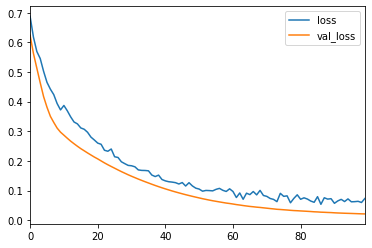

In [10]:
pd.DataFrame(model.history.history).plot()

In [11]:
predictions = np.round(model.predict(X_test))

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00       173

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [14]:
from tensorflow.keras.models import load_model
model.save('wine_predictor_model.h5')